In [1]:
from pathlib import Path
from matplotlib.colors import same_color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

import gffpandas.gffpandas as gffpd
import math
import re


In [4]:
def plot_LFCs(concat_df, include_control=True, cumulative=True, fig_out_path=None, alpha=1):

    fig = plt.figure(figsize=(10, 10), constrained_layout=True)
    ax = fig.gca()

    joined_df = concat_df.xs(key='log2FoldChange', axis=1, level=1)

    if include_control:
        joined_df['Control'] = 0

    for row in joined_df.to_numpy():
        if cumulative:
            ax.plot(range(len(row)), np.cumsum(row), alpha=alpha)
        else:
            ax.plot(range(len(row)), row, alpha=alpha)

    ax.set_xticks(range(len(row)))
    ax.set_xticklabels(joined_df.columns)
    
    ax.set_xlabel('addition')
    ax.set_ylabel('log2FoldChange')
    
    if fig_out_path:
        plt.savefig(fig_out_path)
    else:
        plt.show()
    plt.close()

def plot_LFCs_scatter(concat_df, fig_out_path=None, alpha=1):

    joined_df = concat_df.xs(key='log2FoldChange', axis=1, level=1)

    fig = plt.figure(figsize=(10, 10), constrained_layout=True)
    ax = fig.gca()

    for row in joined_df.to_numpy():
        ax.plot(row[0], row[1], "r.", alpha=alpha)
    
    if fig_out_path:
        plt.savefig(fig_out_path)
    else:
        plt.show()
    plt.close()

def plot_pathways_LFC_scatter(concat_df, bool_series, fig_out_path=None, alpha=1):

    joined_df = concat_df.xs(key='log2FoldChange', axis=1, level=1)

    fig = plt.figure(figsize=(10, 10), constrained_layout=True)
    ax = fig.gca()

    non_pathway_df = joined_df[~bool_series]
    for row in non_pathway_df.to_numpy():
        ax.plot(row[0], row[1], marker='.', color='gray', alpha=alpha)

    pathway_df = joined_df[bool_series]
    for row in pathway_df.to_numpy():
        ax.plot(row[0], row[1], marker='.', color='red', alpha=alpha)
    
    if fig_out_path:
        plt.savefig(fig_out_path)
    else:
        plt.show()
    plt.close()

def plot_all_pathways(concat_df, go_dict, out_dir):
    for col, unique_vals in go_dict.items():
        category = re.search(r'\((.*?)\)', col).group(1).replace(" ", "_")
        category_dir = out_dir / category
        category_dir.mkdir(exist_ok=True)
        for val in unique_vals:
            out_path = category_dir / val.replace("'", "").replace(" ", "_")
            bool_series = complex_df['pathway', col].notna() & complex_df['pathway', col].str.contains(val)
            plot_pathways_LFC_scatter(concat_df, bool_series, fig_out_path=out_path, alpha=0.5)

In [5]:
experiment_4_results_df = pd.read_csv("/nfs/chisholmlab001/kve/2021_Sar11Pro_RNAseq_Project/data/results/experiments/experiment_4/DGE_tables/experiment_4_MIT9301_DGE_all.tsv", index_col=0, sep="\t")
experiment_11_results_df = pd.read_csv("/nfs/chisholmlab001/kve/2021_Sar11Pro_RNAseq_Project/data/results/experiments/experiment_11/DGE_tables/experiment_11_MIT9301_DGE_all.tsv", index_col=0,  sep="\t")

experiment_4_results_df = experiment_4_results_df[~experiment_4_results_df.index.duplicated()]
experiment_11_results_df = experiment_11_results_df[~experiment_11_results_df.index.duplicated()]

concat_df = pd.concat({"proMS" : experiment_11_results_df, "co-cultures" : experiment_4_results_df}, axis=1, names=['treatment'])

concat_df

treatment                   proMS                                            \
                         baseMean symlog10baseMean log2FoldChange     lfcSE   
long_ID                                                                       
rna-P9301_RS14955      544.145919         2.736513       3.103619  0.416015   
rna-P9301_RS10845   654622.241083         5.815991       1.799087  0.242887   
cds-WP_011862070.1      25.196032         1.418236      -2.631780  0.406931   
cds-WP_002805232.1   13366.142924         4.126039       0.678632  0.110118   
rna-P9301_RS11060       96.007862         1.986807       1.422209  0.234185   
...                           ...              ...            ...       ...   
cds-WP_011862087.1    2415.320876         3.383155       0.002076  0.278731   
cds-WP_011818291.1    8287.182590         3.918459      -0.001108  0.264112   
rna-P9301_RS11510      737.400190         2.868292      -0.000777  0.191409   
cds-WP_041484707.1      42.463583         1.638126       0.001097  0.231568   
cds-WP_002805661.1     928.860109         2.968418      -0.000849  0.182362   

treatment                                                 \
                        stat        pvalue          padj   
long_ID                                                    
rna-P9301_RS14955   7.460361  8.628569e-14  1.214736e-10   
rna-P9301_RS10845   7.407101  1.290899e-13  1.214736e-10   
cds-WP_011862070.1 -6.467381  9.971586e-11  6.255508e-08   
cds-WP_002805232.1  6.162761  7.148749e-10  3.363486e-07   
rna-P9301_RS11060   6.073024  1.255239e-09  4.724721e-07   
...                      ...           ...           ...   
cds-WP_011862087.1  0.007449  9.940568e-01  9.961773e-01   
cds-WP_011818291.1 -0.004194  9.966537e-01  9.967616e-01   
rna-P9301_RS11510  -0.004059  9.967616e-01  9.967616e-01   
cds-WP_041484707.1  0.004737  9.962201e-01  9.967616e-01   
cds-WP_002805661.1 -0.004658  9.962838e-01  9.967616e-01   

treatment                                                                     \
                                                        product       seq_id   
long_ID                                                                        
rna-P9301_RS14955                                      tRNA-Pro  NC_009091.1   
rna-P9301_RS10845                             23S ribosomal RNA  NC_009091.1   
cds-WP_011862070.1                         hypothetical protein  NC_009091.1   
cds-WP_002805232.1                    50S ribosomal protein L11  NC_009091.1   
rna-P9301_RS11060                                      tRNA-Tyr  NC_009091.1   
...                                                         ...          ...   
cds-WP_011862087.1                            AAA family ATPase  NC_009091.1   
cds-WP_011818291.1                          phosphoribulokinase  NC_009091.1   
rna-P9301_RS11510                                      tRNA-Asp  NC_009091.1   
cds-WP_041484707.1                         hypothetical protein  NC_009091.1   
cds-WP_002805661.1  photosystem II reaction center protein PsbH  NC_009091.1   

treatment                             ...   co-cultures          \
                              source  ... old_locus_tag partial   
long_ID                               ...                         
rna-P9301_RS14955        tRNAscan-SE  ...           NaN     NaN   
rna-P9301_RS10845           cmsearch  ...           NaN     NaN   
cds-WP_011862070.1  Protein Homology  ...           NaN     NaN   
cds-WP_002805232.1  Protein Homology  ...           NaN     NaN   
rna-P9301_RS11060        tRNAscan-SE  ...           NaN     NaN   
...                              ...  ...           ...     ...   
cds-WP_011862087.1  Protein Homology  ...           NaN     NaN   
cds-WP_011818291.1  Protein Homology  ...           NaN     NaN   
rna-P9301_RS11510        tRNAscan-SE  ...           NaN     NaN   
cds-WP_041484707.1  Protein Homology  ...           NaN     NaN   
cds-WP_002805661.1  Protein Homology  ...           NaN     

In [6]:
joined_df = concat_df.xs(key='log2FoldChange', axis=1, level=1)

In [7]:
plot_LFCs(concat_df, include_control=False, cumulative=False, fig_out_path="/home/kve/scripts/mini_projects/2021_Sar11Pro_RNAseq_Project/analyse_media/plots/LFC_proMS_co-culture_non-cumulative_v2.png")

In [8]:
plot_LFCs(concat_df, include_control=True, cumulative=True, fig_out_path="/home/kve/scripts/mini_projects/2021_Sar11Pro_RNAseq_Project/analyse_media/plots/LFC_proMS_co-culture_cumulative_v2.png")

/tmp/ipykernel_51909/1263009136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['Control'] = 0


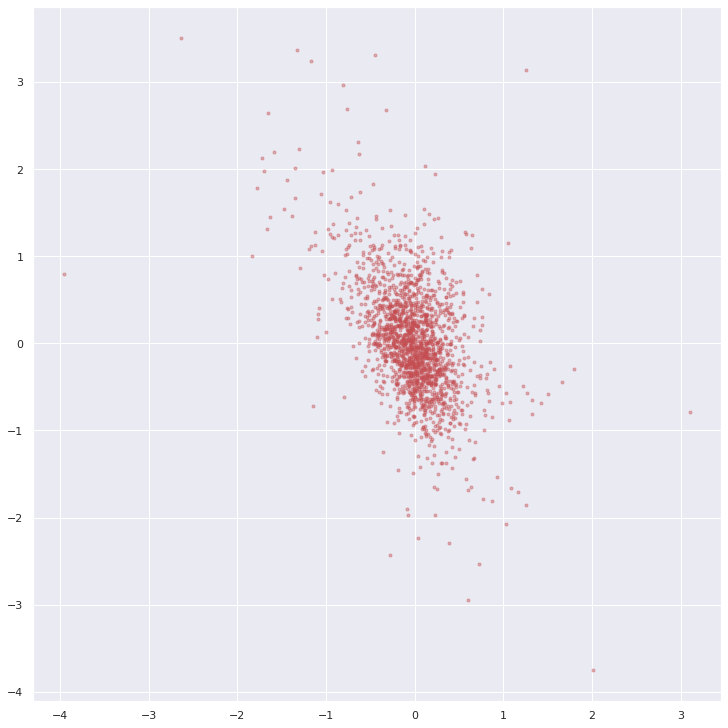

In [9]:
plot_LFCs_scatter(concat_df, alpha=0.4) #, fig_out_path="/home/kve/scripts/mini_projects/2021_Sar11Pro_RNAseq_Project/analyse_media/plots/plotting_media_co-culture_effects_v1.png")

In [3]:
pathway_df = pd.read_csv("pathway_tools_df_MIT9301.tsv", sep='\t')
pathway_df = pathway_df.set_index("NCBI-Protein")
pathway_df = pd.concat({'pathway':pathway_df}, axis=1)
pathway_df = pathway_df[pathway_df.index.notna() & ~pathway_df.index.duplicated()]

In [11]:
complex_df = concat_df.join(pathway_df, on=[('proMS','protein_id')])

#checks to make sure there are no duplicated indexes 
complex_df[complex_df.index.duplicated(keep=False)]

Empty DataFrame
Columns: [(proMS, baseMean), (proMS, symlog10baseMean), (proMS, log2FoldChange), (proMS, lfcSE), (proMS, stat), (proMS, pvalue), (proMS, padj), (proMS, product), (proMS, seq_id), (proMS, source), (proMS, type), (proMS, start), (proMS, end), (proMS, score), (proMS, strand), (proMS, phase), (proMS, attributes), (proMS, Dbxref), (proMS, Is_circular), (proMS, Name), (proMS, Note), (proMS, Parent), (proMS, anticodon), (proMS, bound_moiety), (proMS, end_range), (proMS, exception), (proMS, gbkey), (proMS, gene), (proMS, gene_biotype), (proMS, genome), (proMS, inference), (proMS, locus_tag), (proMS, mol_type), (proMS, old_locus_tag), (proMS, partial), (proMS, protein_id), (proMS, pseudo), (proMS, regulatory_class), (proMS, strain), (proMS, transl_table), (proMS, organism), (proMS, gene_synonym), (proMS, start_range), (co-cultures, baseMean), (co-cultures, symlog10baseMean), (co-cultures, log2FoldChange), (co-cultures, lfcSE), (co-cultures, stat), (co-cultures, pvalue), (co-cultures, padj), (co-cultures, product), (co-cultures, seq_id), (co-cultures, source), (co-cultures, type), (co-cultures, start), (co-cultures, end), (co-cultures, score), (co-cultures, strand), (co-cultures, phase), (co-cultures, attributes), (co-cultures, Dbxref), (co-cultures, Is_circular), (co-cultures, Name), (co-cultures, Note), (co-cultures, Parent), (co-cultures, anticodon), (co-cultures, bound_moiety), (co-cultures, end_range), (co-cultures, exception), (co-cultures, gbkey), (co-cultures, gene), (co-cultures, gene_biotype), (co-cultures, genome), (co-cultures, inference), (co-cultures, locus_tag), (co-cultures, mol_type), (co-cultures, old_locus_tag), (co-cultures, partial), (co-cultures, protein_id), (co-cultures, pseudo), (co-cultures, regulatory_class), (co-cultures, strain), (co-cultures, transl_table), (co-cultures, organism), (co-cultures, gene_synonym), (co-cultures, start_range), (pathway, Proteins), (pathway, GO terms (biological process)), (pathway, GO terms (cellular component)), (pathway, GO terms (molecular function)), (pathway, Genes of polypeptide, complex, or RNA), (pathway, Pathways of enzyme), (pathway, UniProt-via-RefSeq), (pathway, Data-Source), (pathway, Pfam)]
Index: []

[0 rows x 95 columns]

In [6]:
def make_legal(s):
    s = re.sub(r'<.*?>', '', s).replace("/", " or ")
    s = re.sub('[\&\';.\[\]]', '', s)
    return s


go_dict = {}
for col in ['Pathways of enzyme', 'GO terms (biological process)', 'GO terms (cellular component)', 'GO terms (molecular function)']:
    gene_group_terms = pathway_df[pathway_df['pathway',col].notna()]['pathway', col].to_list()
    gene_group_terms_list = [s.split(" // ") for s in gene_group_terms]
    gene_group_terms_set = {item for sublist in gene_group_terms_list for item in sublist}

    legal_dict = {}
    for term in gene_group_terms_set:
        legal_dict[term] = make_legal(term)

    gene_group_terms_legal_list = [[legal_dict[term] for term in gene_terms_list] for gene_terms_list in gene_group_terms_list]
    gene_legal_list = [" // ".join(l) for l in gene_group_terms_legal_list]

    assert len(gene_legal_list) == len(gene_group_terms)

    go_dict[col] = legal_dict.values()

In [10]:
s = 0
for k, v in go_dict.items():
    print(f"{k}: length {len(v)}")
    s += len(v)
print(s)

Pathways of enzyme: length 195
GO terms (biological process): length 456
GO terms (cellular component): length 49
GO terms (molecular function): length 716
1416


In [13]:
complex_df[~(complex_df['pathway','GO terms (biological process)'].notna() & complex_df['pathway','GO terms (biological process)'].str.contains('ATP biosynthetic process'))]

treatment                   proMS                                            \
                         baseMean symlog10baseMean log2FoldChange     lfcSE   
long_ID                                                                       
rna-P9301_RS14955      544.145919         2.736513       3.103619  0.416015   
rna-P9301_RS10845   654622.241083         5.815991       1.799087  0.242887   
cds-WP_011862070.1      25.196032         1.418236      -2.631780  0.406931   
cds-WP_002805232.1   13366.142924         4.126039       0.678632  0.110118   
rna-P9301_RS11060       96.007862         1.986807       1.422209  0.234185   
...                           ...              ...            ...       ...   
cds-WP_011862087.1    2415.320876         3.383155       0.002076  0.278731   
cds-WP_011818291.1    8287.182590         3.918459      -0.001108  0.264112   
rna-P9301_RS11510      737.400190         2.868292      -0.000777  0.191409   
cds-WP_041484707.1      42.463583         1.638126       0.001097  0.231568   
cds-WP_002805661.1     928.860109         2.968418      -0.000849  0.182362   

treatment                                                 \
                        stat        pvalue          padj   
long_ID                                                    
rna-P9301_RS14955   7.460361  8.628569e-14  1.214736e-10   
rna-P9301_RS10845   7.407101  1.290899e-13  1.214736e-10   
cds-WP_011862070.1 -6.467381  9.971586e-11  6.255508e-08   
cds-WP_002805232.1  6.162761  7.148749e-10  3.363486e-07   
rna-P9301_RS11060   6.073024  1.255239e-09  4.724721e-07   
...                      ...           ...           ...   
cds-WP_011862087.1  0.007449  9.940568e-01  9.961773e-01   
cds-WP_011818291.1 -0.004194  9.966537e-01  9.967616e-01   
rna-P9301_RS11510  -0.004059  9.967616e-01  9.967616e-01   
cds-WP_041484707.1  0.004737  9.962201e-01  9.967616e-01   
cds-WP_002805661.1 -0.004658  9.962838e-01  9.967616e-01   

treatment                                                                     \
                                                        product       seq_id   
long_ID                                                                        
rna-P9301_RS14955                                      tRNA-Pro  NC_009091.1   
rna-P9301_RS10845                             23S ribosomal RNA  NC_009091.1   
cds-WP_011862070.1                         hypothetical protein  NC_009091.1   
cds-WP_002805232.1                    50S ribosomal protein L11  NC_009091.1   
rna-P9301_RS11060                                      tRNA-Tyr  NC_009091.1   
...                                                         ...          ...   
cds-WP_011862087.1                            AAA family ATPase  NC_009091.1   
cds-WP_011818291.1                          phosphoribulokinase  NC_009091.1   
rna-P9301_RS11510                                      tRNA-Asp  NC_009091.1   
cds-WP_041484707.1                         hypothetical protein  NC_009091.1   
cds-WP_002805661.1  photosystem II reaction center protein PsbH  NC_009091.1   

treatment                             ... co-cultures  \
                              source  ... start_range   
long_ID                               ...               
rna-P9301_RS14955        tRNAscan-SE  ...         NaN   
rna-P9301_RS10845           cmsearch  ...         NaN   
cds-WP_011862070.1  Protein Homology  ...         NaN   
cds-WP_002805232.1  Protein Homology  ...         NaN   
rna-P9301_RS11060        tRNAscan-SE  ...         NaN   
...                              ...  ...         ...   
cds-WP_011862087.1  Protein Homology  ...         NaN   
cds-WP_011818291.1  Protein Homology  ...         NaN   
rna-P9301_RS11510        tRNAscan-SE  ...         NaN   
cds-WP_041484707.1  Protein Homology  ...         NaN   
cds-WP_002805661.1  Protein Homology  ...         NaN   

treatment                                             pathway  \
                                                     Proteins   
lo

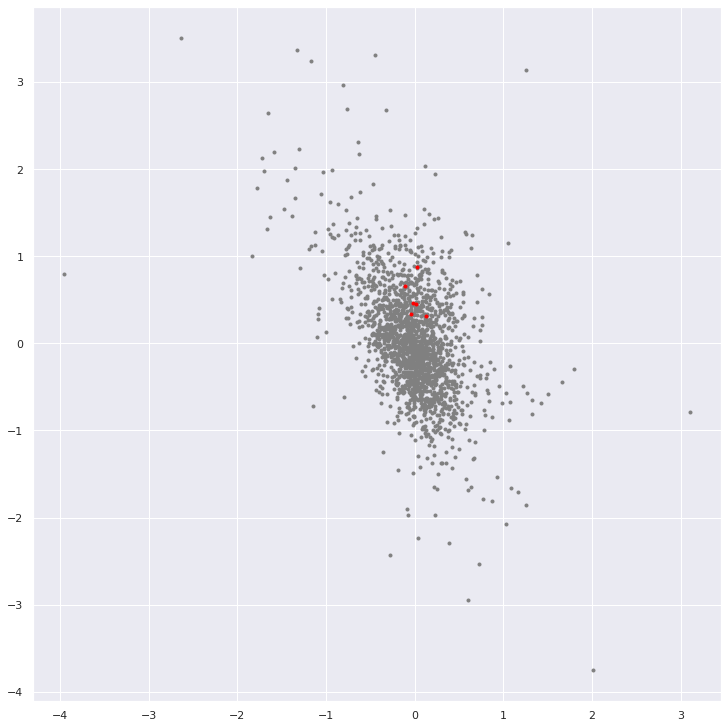

In [14]:
bool_series = complex_df['pathway','GO terms (biological process)'].notna() & complex_df['pathway','GO terms (biological process)'].str.contains('ATP biosynthetic process')

plot_pathways_LFC_scatter(concat_df, bool_series)

KeyboardInterrupt: 

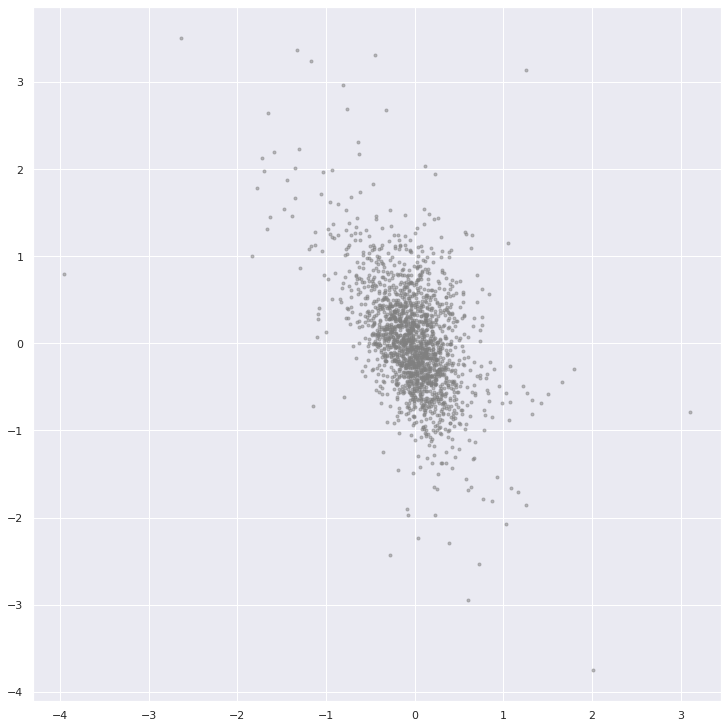

In [15]:
plot_all_pathways(concat_df, go_dict, Path("/nfs/chisholmlab001/kve/2021_Sar11Pro_RNAseq_Project/analyse_media/pathway_scatter_plots"))